<a href="https://colab.research.google.com/github/Prajwayne/Classification-Problems-/blob/main/Logistic%20Regression%20and%20Ranodm%20forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 

# for data visualization
import seaborn as sns 
import matplotlib.pylab as plt

# for the pre-processing of the data
from sklearn.preprocessing import StandardScaler

# for machine learning models 
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# for the metrics of machine learning models 
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn.model_selection import KFold

# others 
import time
import random

In [ ]:
pulsar_stars = pd.read_csv("/content/coursework_resit (1).csv",header=None)

# to check if we have to clean the data 
print(pulsar_stars.apply(pd.Series.count))

 The different features that describe an observation

EDA

In [ ]:
pulsar_stars.isnull().values.any()

False

In [ ]:
# adding column name to the respective columns
pulsar_stars.columns =['one','two','three','four','five','six','seven','eight','target_class']
  
# displaying the DataFrame
pulsar_stars.head()

,one,two,three,four,five,six,seven,eight,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


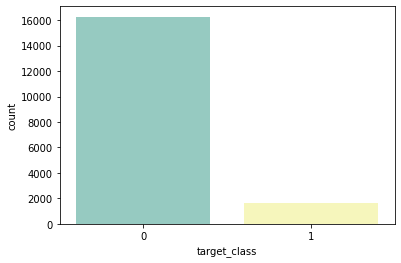

In [ ]:
sns.countplot(x = 'target_class', data = pulsar_stars, palette = 'Set3')

Train Test Split

In [ ]:
# we set the seed for the random cursor
random.seed(10)

# we split the data
X = pulsar_stars.drop(['target_class'], axis = 1)
y = pulsar_stars['target_class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.8, random_state = 10)
X_columns = X_train.columns

In [ ]:
# Investigate all the elements whithin each Feature 

for column in pulsar_stars:
    unique_values = np.unique(pulsar_stars[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature one is: 8626
The number of values for feature two is: 17862
The number of values for feature three is: 17897
The number of values for feature four is: 17898
The number of values for feature five is: 9000
The number of values for feature six is: 17894
The number of values for feature seven is: 17895
The number of values for feature eight is: 17895
The number of values for feature target_class is: 2 -- [0 1]


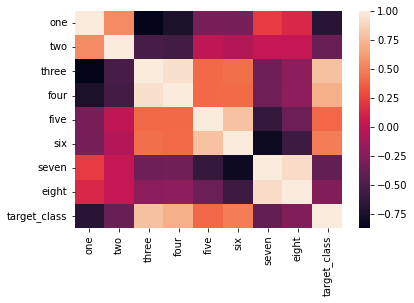

In [ ]:
#correlation plot
corr = pulsar_stars.corr()
sns.heatmap(corr)

It is clear that the integrated profile's excess kurtosis is more highly connected with the target class.

In [ ]:
#create numeric plots
num = [f for f in X_train.columns if X_train.dtypes[f] != 'object']
nd = pd.melt(X_train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=3, height = 5.5, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

As you can see, most of the variables are right skewed but we will still have to make some transformations for the others

**Pre-processing**

Standard scalar 

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns = X_columns)
X_test = pd.DataFrame(X_test, columns = X_columns)

In [ ]:
X_test

Dummy Classifier 

In [ ]:
# Training a Dummy Classifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
# score = dummy_clf.score(X_test, y_test)

# pred_proba_t = dummy_clf.predict_proba(X_test)
# # log_loss2 = log_loss(y_test, pred_proba_t)

# print("Testing Acc:", score)
# # print("Log Loss:", log_loss2)

DummyClassifier(strategy='most_frequent')

In [ ]:
y_pred_dummy  = dummy_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_dummy)
print(cm)
accuracy_score(y_test, y_pred_dummy)

[[13011     0]
 [ 1308     0]]


0.908652838885397

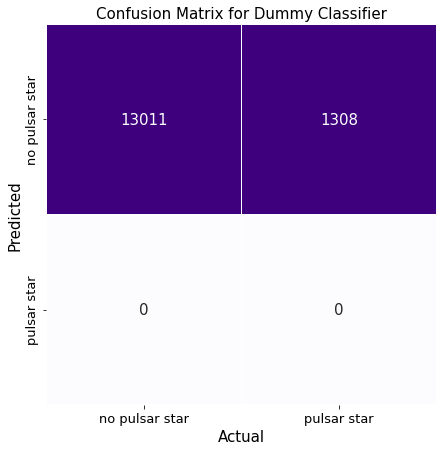


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     13011
           1       0.00      0.00      0.00      1308

    accuracy                           0.91     14319
   macro avg       0.45      0.50      0.48     14319
weighted avg       0.83      0.91      0.87     14319



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# generate confusion matrix for Logistic Regression classifier
conf_mat_lg = confusion_matrix(y_test,y_pred_dummy )
# put it into a dataframe for seaborn plot function
conf_math_lg_df = pd.DataFrame(conf_mat_lg)

# Use a seaborn heatmap to plot confusion matrices
# The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
# annot = True includes the numbers in each box
# vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(conf_math_lg_df.T, annot=True, annot_kws={"size": 15}, cmap="Purples", vmin=0, vmax=800, fmt='.0f', 
            linewidths=1, linecolor="white", cbar=False, xticklabels=["no pulsar star","pulsar star"], 
            yticklabels=["no pulsar star","pulsar star"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["no pulsar star","pulsar star"], fontsize=13)
ax.set_yticklabels(["no pulsar star","pulsar star"], fontsize=13)
plt.title("Confusion Matrix for Dummy Classifier", fontsize=15)

plt.show()
print("")
print(classification_report(y_test, y_pred_dummy))


Implementing Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred_lg = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_lg)
print(cm)
accuracy_score(y_test, y_pred_lg)

[[12926    85]
 [  222  1086]]


0.9785599553041413

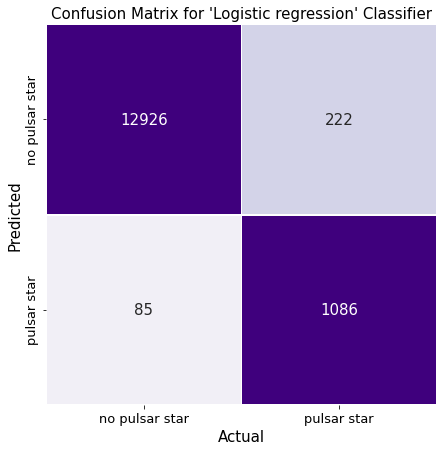


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     13011
           1       0.93      0.83      0.88      1308

    accuracy                           0.98     14319
   macro avg       0.96      0.91      0.93     14319
weighted avg       0.98      0.98      0.98     14319



In [ ]:
# generate confusion matrix for Logistic Regression classifier
conf_mat_lg = confusion_matrix(y_test, y_pred_lg)
# put it into a dataframe for seaborn plot function
conf_math_lg_df = pd.DataFrame(conf_mat_lg)

# Use a seaborn heatmap to plot confusion matrices
# The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
# annot = True includes the numbers in each box
# vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(conf_math_lg_df.T, annot=True, annot_kws={"size": 15}, cmap="Purples", vmin=0, vmax=800, fmt='.0f', 
            linewidths=1, linecolor="white", cbar=False, xticklabels=["no pulsar star","pulsar star"], 
            yticklabels=["no pulsar star","pulsar star"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["no pulsar star","pulsar star"], fontsize=13)
ax.set_yticklabels(["no pulsar star","pulsar star"], fontsize=13)
plt.title("Confusion Matrix for 'Logistic regression' Classifier", fontsize=15)

plt.show()
print("")
print(classification_report(y_test, y_pred_lg))


# performance_df['Logistic_regression']['f1_score_weighted'] = f1_score(y_test, y_pred, average = 'weighted')

In [ ]:
# pip install scikit-plot

In [ ]:
#import scikitplot as skplt
problg = classifier.predict_proba(X_test)


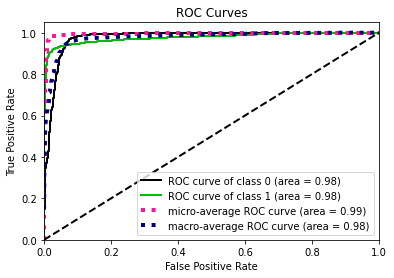

In [ ]:
skplt.metrics.plot_roc(y_test, problg)

Implementing Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred_rf = classifier_rf.predict(X_test)

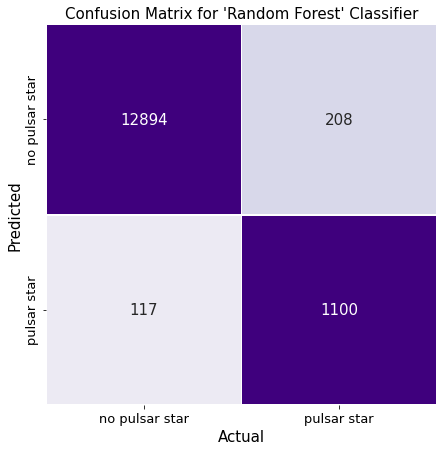


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     13011
           1       0.90      0.84      0.87      1308

    accuracy                           0.98     14319
   macro avg       0.94      0.92      0.93     14319
weighted avg       0.98      0.98      0.98     14319



In [ ]:
# generate confusion matrix for Logistic Regression classifier
conf_mat_lg = confusion_matrix(y_test, y_pred_rf)
# put it into a dataframe for seaborn plot function
conf_math_lg_df = pd.DataFrame(conf_mat_lg)

# Use a seaborn heatmap to plot confusion matrices
# The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
# annot = True includes the numbers in each box
# vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(conf_math_lg_df.T, annot=True, annot_kws={"size": 15}, cmap="Purples", vmin=0, vmax=800, fmt='.0f', 
            linewidths=1, linecolor="white", cbar=False, xticklabels=["no pulsar star","pulsar star"], 
            yticklabels=["no pulsar star","pulsar star"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["no pulsar star","pulsar star"], fontsize=13)
ax.set_yticklabels(["no pulsar star","pulsar star"], fontsize=13)
plt.title("Confusion Matrix for 'Random Forest' Classifier", fontsize=15)

plt.show()
print("")
print(classification_report(y_test, y_pred_rf))


# performance_df['Logistic_regression']['f1_score_weighted'] = f1_score(y_test, y_pred, average = 'weighted')

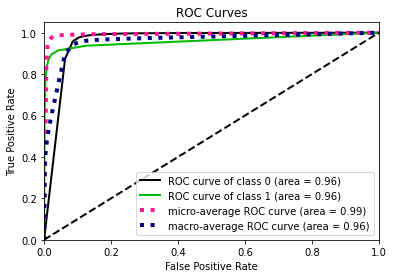

In [ ]:
skplt.metrics.plot_roc(y_test, probrf)

In [ ]:
accuracy = []
# for j in estim:
for i in range(1,10):
    r = RandomForestClassifier(n_estimators = 20, max_depth = i)
    r.fit(X_train, y_train)
    accuracy.append(r.score(X_test,y_test))

plt.plot(accuracy)

Implementing Hyperparameter Tuning 

In [ ]:
param_grid = { 
    'n_estimators': [10, 20, 50],
    'criterion' :['gini', 'entropy'],
    'max_depth':[3,4,5,6,7,8,9,10]
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring = 'recall')

In [ ]:
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 20, 50]},
             scoring='recall')

In [ ]:
y_predCV = CV_rfc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predCV)
print(cm)
accuracy_score(y_test, y_predCV)

[[12901   110]
 [  195  1113]]


0.9786996298624205

In [ ]:
bestp = CV_rfc.best_params_

In [ ]:
bestp

{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 20}

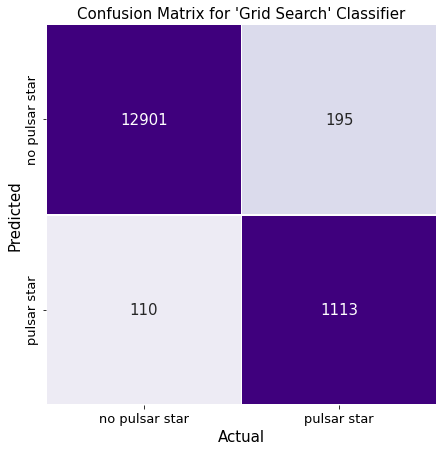


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13011
           1       0.91      0.85      0.88      1308

    accuracy                           0.98     14319
   macro avg       0.95      0.92      0.93     14319
weighted avg       0.98      0.98      0.98     14319



In [ ]:
# generate confusion matrix for Logistic Regression classifier
conf_mat_lg = confusion_matrix(y_test, y_predCV)
# put it into a dataframe for seaborn plot function
conf_math_lg_df = pd.DataFrame(conf_mat_lg)

# Use a seaborn heatmap to plot confusion matrices
# The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
# annot = True includes the numbers in each box
# vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(conf_math_lg_df.T, annot=True, annot_kws={"size": 15}, cmap="Purples", vmin=0, vmax=800, fmt='.0f', 
            linewidths=1, linecolor="white", cbar=False, xticklabels=["no pulsar star","pulsar star"], 
            yticklabels=["no pulsar star","pulsar star"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["no pulsar star","pulsar star"], fontsize=13)
ax.set_yticklabels(["no pulsar star","pulsar star"], fontsize=13)
plt.title("Confusion Matrix for 'Grid Search' Classifier", fontsize=15)

plt.show()
print("")
print(classification_report(y_test, y_predCV))